# Web Scraping Stock Data of Tesla and plotting a chart of its Annual Revenue

In [1]:
# importing the necessary libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
# www.macrotrends.net is a popular stock market website. I will use it to get Tesla's information
dividends = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01"
data = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/stock-price-history"

In [3]:
#getting request data
tesla_dividends = requests.get(dividends).text
tesla_data = requests.get(data).text

In [4]:
#Creating Beautiful Soup Objects
tesla_div_soup = BeautifulSoup(tesla_dividends, "html.parser")
tesla_data_soup = BeautifulSoup(tesla_data, "html.parser")

In [5]:
#Creating a dataframe to store information about historical data of the stock
tesla_history = pd.DataFrame(columns=["Year", "Stock Price", "Open", "High", "Low", "Close", "Annual %Change"])

# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in tesla_data_soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    year = col[0].text
    price = col[1].text
    Open = col[2].text
    high = col[3].text
    low = col[4].text
    close = col[5].text
    change = col[6].text
    
    # Finally we append the data of each row to the table
    tesla_history = tesla_history.append({"Year":year, "Stock Price": price, "Open":Open,
                                      "High":high, "Low":low, "Close":close,
                                      "Annual %Change":change}, ignore_index=True)    

In [6]:
tesla_history

,Year,Stock Price,Open,High,Low,Close,Annual %Change
0,2021,779.9945,729.7700,1229.9100,563.0000,1056.7800,49.76%
1,2020,289.9971,86.0520,705.6700,72.2440,705.6700,743.44%
2,2019,54.7060,62.0240,86.1880,35.7940,83.6660,25.70%
3,2018,63.4620,64.1060,75.9140,50.1120,66.5600,6.89%
4,2017,62.8633,43.3980,77.0000,43.3980,62.2700,45.70%
5,2016,41.9535,44.6820,53.0840,28.7340,42.7380,-10.97%
6,2015,46.0085,43.8620,56.4520,37.0000,48.0020,7.91%
7,2014,44.6658,30.0200,57.2080,27.8680,44.4820,47.85%
8,2013,20.8803,7.0720,38.6740,6.5820,30.0858,344.14%
9,2012,6.2337,5.6160,7.6020,4.5580,6.7740,18.59%


In [7]:
tesla_div_soup.title

<title>Tesla Revenue 2009-2021 | TSLA | MacroTrends</title>

In [8]:
tesla = pd.DataFrame(columns = ["Date", "Revenue(Millions of US $)"])

for row in tesla_div_soup.tbody.find_all('tr'):
    col = row.find_all('td')
    Year = col[0].text
    Rev = col[1].text
    tesla = tesla.append({"Date":Year, "Revenue(Millions of US $)":Rev}, ignore_index=True)
    
tesla

,Date,Revenue(Millions of US $)
0,2020,"$31,536"
1,2019,"$24,578"
2,2018,"$21,461"
3,2017,"$11,759"
4,2016,"$7,000"
5,2015,"$4,046"
6,2014,"$3,198"
7,2013,"$2,013"
8,2012,$413
9,2011,$204


In [9]:
# Stripping the Revenue columns off the special Characters
tesla['Revenue(Millions of US $)'] = tesla['Revenue(Millions of US $)'].replace('[$,]',"", regex = True)
tesla

,Date,Revenue(Millions of US $)
0,2020,31536
1,2019,24578
2,2018,21461
3,2017,11759
4,2016,7000
5,2015,4046
6,2014,3198
7,2013,2013
8,2012,413
9,2011,204


### Checking the data type of the columns

In [10]:
tesla.dtypes

Date                         object
Revenue(Millions of US $)    object
dtype: object

In [11]:
tesla = tesla.astype('int32')

In [12]:
tesla.dtypes

Date                         int32
Revenue(Millions of US $)    int32
dtype: object

## Plotting a line chart of Revenue per Year

Text(0.5, 1.0, 'Revenue per Year')

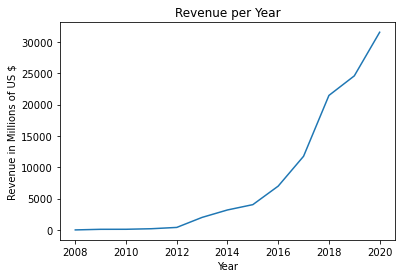

In [13]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot 

plt.pyplot.plot(tesla['Date'], tesla['Revenue(Millions of US $)'])
plt.pyplot.xlabel("Year")
plt.pyplot.ylabel("Revenue in Millions of US $")
plt.pyplot.title("Revenue per Year")

## Author

### Debarshi Biswas